<a href="https://colab.research.google.com/github/campeone-pixel/soccer_database/blob/master/ProyectoDS_ParteI_%2BCannoni%2BPoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explicación del dataset escogido






El dataset escogido es relacionado al fútbol. Tiene una muy completa información desde el 2014 hasta el 2020.
El mismo se encuentra dividido en 7 partes.
En el dataset "appearences" se hallan estadísticas de cada futbolista en cada aparición en un partido. Tales como goles, disparos, asistencias, posición, tarjeta amarilla, tarjeta roja, cuánto tiempo jugó, si lo sustituyeron.
El dataset "games" refiere a estadísticas relacionadas con los partidos disputados en dicho rango de tiempo. En el mismo se encuentra, como lo más sobresaliente, la temporada, el día y la hora en el que se disputó el encuentro, qué equipos lo hicieron, los goles convertidos por parte de cada uno.
El dataset "leagues" refiere a las 5 ligas más importantes del mundo, de las cuales se obtuvieron la información. Estas son la española, la inglesa, la italiana, la alemana y la francesa.
El dataset "players" es acerca de todos los jugadores que disputaron partidos en dicho periodo de tiempo y en dichas ligas.
El dataset "shots" es sobre los disparos efectuados por los jugadores en los partidos, en qué minuto de juego, en qué situación de juego, con qué parte del cuerpo y el resultado de ese remate, entre otras.
El dataset "teams" se refiere a los equipos que disputaron los partidos en las ligas y periodo mencionados anteriormente.
El dataset "teamstats" es acerca de las estadísticas de cada equipo en cada partido, tales como el año que se disputó, el día y la hora, en qué condición lo hizo, la cantidad de goles que realizó y le concedieron, los disparos, las faltas, los corners, las tarjetas amarillas y rojas.

Teniendo en cuenta toda esta información surgen algunas preguntas, las cuales se van a resolver en este trabajo, como lo son:


*   ¿El equipo local, gana mucho más que el visitante?
*   ¿A medida que avanza el tiempo, es más fácil o más difícil hacer goles? Teniendo en cuenta que se estudia mucho más al rival, su manera de jugar, y se analizan datos estadísticos.


*   ¿Todas las ligas disputan la misma cantidad de partidos, es decir los jugadores sufren igual degaste en todas las ligas?
*   ¿Se mantienen constante los partidos disputados en las ligas durante todo el año?


*   ¿Que liga es la más atractiva para ver fútbol, o sea en cual hay más goles por partido?
*   ¿Los jugadores con más goles, son los más reconocidos mundialmente?








---



##Definicion de objetivo





El objetivo del trabajo es poder predecir resultados de partidos, con el fin de poder ayudar a los cuerpos técnicos de los clubes a obtener más información a la hora de plantear los partidos.

## Contexto comercial

La estadística se está utilizando cada vez más en el ámbito del fútbol. El cuerpo técnico corrobora, en cada partido, los rendimientos que han tenido sus futbolistas particularmente y a los mismos en su conjunto, es decir al equipo. Esto les da una idea de qué aspectos debe corregir para los siguientes compromisos para obtener mejores versiones. 
Con este trabajo se busca que los cuerpos técnicos tengan una nueva herramienta a la hora de planificar sus partidos, con el fin de obtener resultados positivos. Así tendrán una mayor chance de lograr los objetivos deportivos que se propusieron. 

## Problema comercial

Los stakeholders serían los cuerpos técnicos de los distintos clubes. Lo que se les quisiera mostrar serían predicciones de resultados de los partidos para que ellos tomen medidas en base a los mismos y así beneficiar al equipo.

##Contexto analitico

Una casa de apuesta nos contrató debido a que las ganancias que solían tener se están reduciendo con el paso del tiempo. Necesitan volver a la rentabilidad a la cual estaban acostumbrados para mantener su estructura.
Para poder predecir los resultados de los partidos se utilizará un modelo de aprendizaje supervisado, ya que con los datos etiquetados con los que contamos se podrá predecir cómo finalizará. Dentro del mismo, estaría dentro de la categoría de clasificación, ya que el modelo permitirá determinar si el equipo gana, pierde o empata.
Las variables a tener en cuenta para el mismo será:


*   xGoals promedio (Goles esperados)
*   xGoals de los últimos 3 partidos
*   Localía
*   Liga
*   Goles convertidos en el torneo

Para resolver este caso utilizaremos árboles de decisión. Probaremos la eficacia del algoritmo la métrica de precisión (Números de predicciones correctas / Número total de predicciones).





##EDA (Exploración de Datos)

In [33]:

import pandas as pd
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing 


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

In [34]:

df_games = pd.read_csv("df_game_new.csv")
df_teams = pd.read_csv("df_teams_new.csv")
df_appearances = pd.read_csv("df_appearances_new.csv")
df_players = pd.read_csv("df_players_new.csv")

''' df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_game_new.csv")
df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_teams_new.csv")
df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_appearances_new.csv")
df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_players_new.csv")''' 

' df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_game_new.csv")\ndf_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_teams_new.csv")\ndf_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_appearances_new.csv")\ndf_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/df_players_new.csv")'

# Organizamos las tablas

## Primero mergeamos las tablas de df_leagues,df_teams y df_teamstats con df_games

In [35]:
df_games.describe()

,gameID,leagueID,season,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,homeGoalsHalfTime,awayGoalsHalfTime,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,xGoals_home,shots_home,shotsOnTarget_home,deep_home,ppda_home,fouls_home,corners_home,yellowCards_home,redCards_home,xGoals_away,shots_away,shotsOnTarget_away,deep_away,ppda_away,fouls_away,corners_away,yellowCards_away,redCards_away
count,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12675.000000,12675.000000,12675.000000,12677.000000,12677.000000,12677.000000,12662.000000,12662.000000,12662.000000,12660.000000,12660.000000,12660.000000,12674.000000,12674.000000,12674.000000,12676.000000,12676.000000,12676.000000,12678.000000,12678.000000,12678.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12679.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000
mean,7877.707334,2.983912,2016.984148,135.324842,135.333517,1.533202,1.206625,0.448547,0.238177,0.313276,0.674054,0.526262,2.827029,4.080128,4.742449,2.783623,4.016503,4.591634,2.723367,3.913864,4.373739,2.905920,4.213844,4.960691,2.814066,3.922736,4.715202,2.875784,4.121011,4.964436,2.944233,4.237991,5.031667,1.502215,13.706782,4.742350,6.424132,10.495906,12.796136,5.487618,1.922470,0.089984,1.178646,11.216719,3.892587,5.216798,11.835520,13.114984,4.467823,2.142035,0.116404
std,4753.774045,1.437191,2.000075,42.757999,42.767761,1.306732,1.167718,0.284916,0.109579,0.262446,0.830917,0.734664,2.147292,1.449744,4.228600,2.010139,1.371168,3.999540,1.849586,1.160908,3.584305,2.277908,1.615911,4.589909,2.086847,1.289012,4.332977,2.280443,1.558112,4.945039,2.366988,1.729635,4.832513,0.891745,5.264559,2.578636,4.276387,5.609321,4.152450,2.955970,1.352601,0.303297,0.776568,4.656769,2.281611,3.713931,6.925258,4.249684,2.603438,1.374253,0.340057
min,81.000000,1.000000,2014.000000,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,2.000000,1.080000,1.030000,2.050000,1.090000,1.030000,2.100000,1.100000,1.040000,2.080000,1.090000,1.020000,1.200000,1.080000,1.030000,2.200000,1.080000,1.040000,2.300000,1.080000,0.000000,0.000000,0.000000,0.000000,1.897400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.122000,0.000000,0.000000,0.000000,0.000000
25%,3812.750000,2.000000,2015.000000,101.000000,101.000000,1.000000,0.000000,0.197450,0.163400,0.088800,0.000000,0.000000,1.670000,3.300000,2.400000,1.700000,3.300000,2.400000,1.700000,3.300000,2.400000,1.710000,3.390000,2.460000,1.700000,3.200000,2.400000,1.700000,3.300000,2.450000,1.700000,3.360000,2.450000,0.836919,10.000000,3.000000,3.000000,6.814800,10.000000,3.000000,1.000000,0.000000,0.593479,8.000000,2.000000,3.000000,7.483625,10.000000,3.000000,1.000000,0.000000
50%,7981.500000,3.000000,2017.000000,132.000000,132.000000,1.000000,1.000000,0.428600,0.247400,0.242100,0.000000,0.000000,2.200000,3.600000,3.400000,2.200000,3.500000,3.400000,2.200000,3.500000,3.300000,2.240000,3.680000,3.520000,2.250000,3.500000,3.300000,2.200000,3.600000,3.500000,2.250000,3.660000,3.550000,1.343710,13.000000,4.000000,6.000000,9.250000,13.000000,5.000000,2.000000,0.000000,1.032105,11.000000,4.000000,4.000000,10.229700,13.000000,4.000000,2.000000,0.000000
75%,12023.250000,4.000000,2019.000000,163.000000,163.000000,2.000000,2.000000,0.686400,0.307625,0.492725,1.000000,1.000000,3.000000,4.200000,5.250000,3.000000,4.100000,5.000000,2.900000,4.000000,4.900000,3.110000,4.350000,5.440000,3.000000,4.000000,5.000000,3.100000,4.200000,5.250000,3.150000,4.360000,5.540000,2.007617,17.000000,6.000000,9.000000,12.613525,15.000000,7.000000,3.000000,0.000000,1.597970,14.000000,5.000000,7.000000,14.190950,16.000000,6.000000,3.000000,0.000000
max

In [36]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12681 entries, 0 to 12680
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gameID              12680 non-null  float64
 1   leagueID            12680 non-null  float64
 2   season              12680 non-null  float64
 3   date                12680 non-null  object 
 4   homeTeamID          12680 non-null  float64
 5   awayTeamID          12680 non-null  float64
 6   homeGoals           12680 non-null  float64
 7   awayGoals           12680 non-null  float64
 8   homeProbability     12680 non-null  float64
 9   drawProbability     12680 non-null  float64
 10  awayProbability     12680 non-null  float64
 11  homeGoalsHalfTime   12680 non-null  float64
 12  awayGoalsHalfTime   12680 non-null  float64
 13  B365H               12675 non-null  float64
 14  B365D               12675 non-null  float64
 15  B365A               12675 non-null  float64
 16  BWH 

In [37]:
df_games.isna().sum()

gameID        1
leagueID      1
season        1
date          1
homeTeamID    1
             ..
liga          1
home_name     1
away_name     1
month_year    1
match_name    1
Length: 59, dtype: int64

**¿El equipo local, gana mucho más que el visitante?**

<AxesSubplot:ylabel='gameID'>

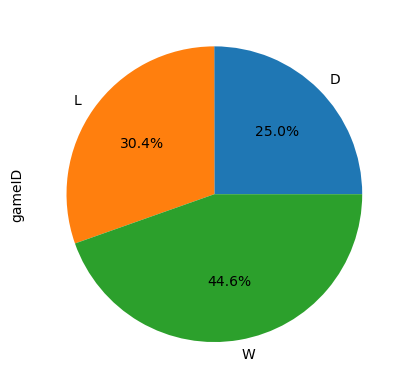

In [38]:
df_games.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%')

Como era de esperarse el equipo local resulta más victorioso que el visitante, aunque la diferencia es más acotada de lo que podíamos pensar.
L = Derrota del local
D = Empate
W = Victoria del local

**¿A medida que avanza el tiempo, es más fácil o más difícil hacer goles?**

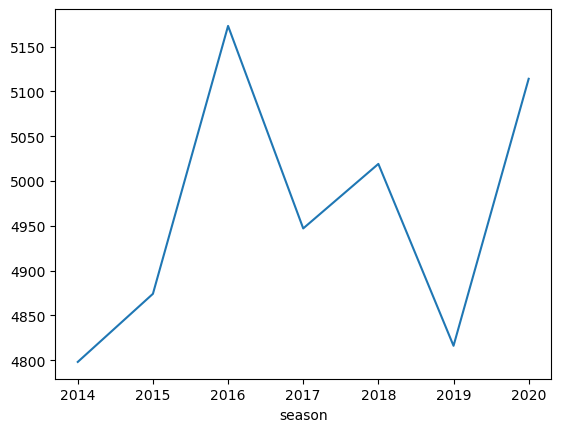

In [39]:
df_games["totalGoals"]= df_games["homeGoals"]  + df_games["awayGoals"]
df_games["goal_diff"]= abs(df_games["homeGoals"]  - df_games["awayGoals"])

df_games["diff_labels"]= df_games['goal_diff'].apply(lambda x: str(x) if x<4 else '4 o mas' )

df_games.groupby(['season'])['totalGoals'].sum().plot()

df_games['month'] = pd.DatetimeIndex(df_games['date']).month

Como puede apreciarse en el gráfico, no existe una relación sobre la hipótesis planteada, ya que si bien parecía que la tendencia después del año 2016 era decreciente hasta el año 2019, en el año 2020 se revirtió y casi igualó la cúspide alcanzada en el año 2016 del rango de tiempo analizado.

**¿Todas las ligas disputan la misma cantidad de partidos, es decir los jugadores sufren igual degaste en todas las ligas?**

<AxesSubplot:xlabel='liga,season'>

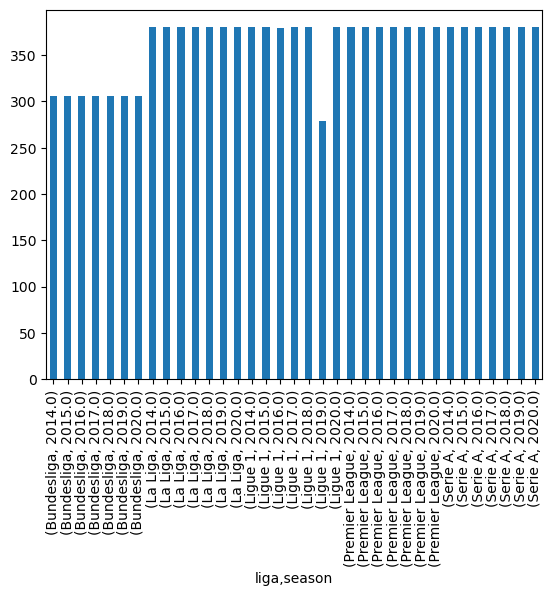

In [40]:
df_games.groupby(['liga','season'])['gameID'].count().plot(kind='bar')

Como conclusión se puede obtener que los jugadores que juegan en la liga alemana (Bundesliga) sufren un menor desgaste que los que disputan las demás ligas, ya que tienen una gran diferencia de partidos jugados por año.

**¿Se mantienen constante los partidos disputados en las ligas durante todo el año?**



Text(0.5, 1.0, 'Ligue 1')

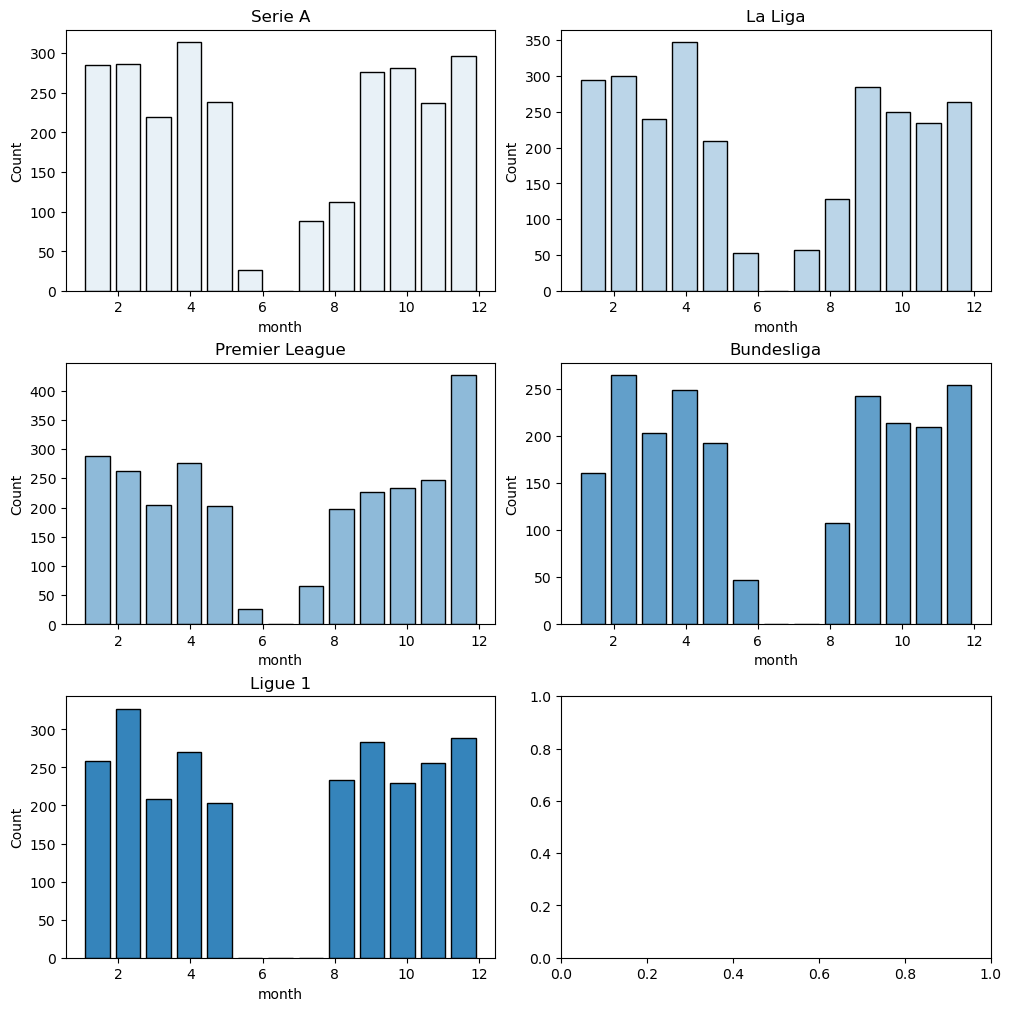

In [41]:
df_f_game_seriea=df_games.loc[df_games['liga']=="Serie A"]
df_f_game_laliga=df_games.loc[df_games['liga']=="La Liga"]
df_f_game_premier=df_games.loc[df_games['liga']=="Premier League"]
df_f_game_bundesliga=df_games.loc[df_games['liga']=="Bundesliga"]
df_f_game_ligue1=df_games.loc[df_games['liga']=="Ligue 1"]

figure, axis = plt.subplots(3, 2, figsize=(10, 10), constrained_layout = True)

sns.histplot(data=df_f_game_seriea, x="month",  shrink=.8, alpha=.1, legend=False,ax=axis[0,0]).set_title("Serie A")
sns.histplot(data=df_f_game_laliga, x="month",  shrink=.8, alpha=.3, legend=False,ax=axis[0,1]).set_title("La Liga")
sns.histplot(data=df_f_game_premier, x="month",  shrink=.8, alpha=.5, legend=False,ax=axis[1,0]).set_title("Premier League")
sns.histplot(data=df_f_game_bundesliga, x="month",  shrink=.8, alpha=.7, legend=False,ax=axis[1,1]).set_title("Bundesliga")
sns.histplot(data=df_f_game_ligue1, x="month",  shrink=.8, alpha=.9, legend=False,ax=axis[2,0]).set_title("Ligue 1")



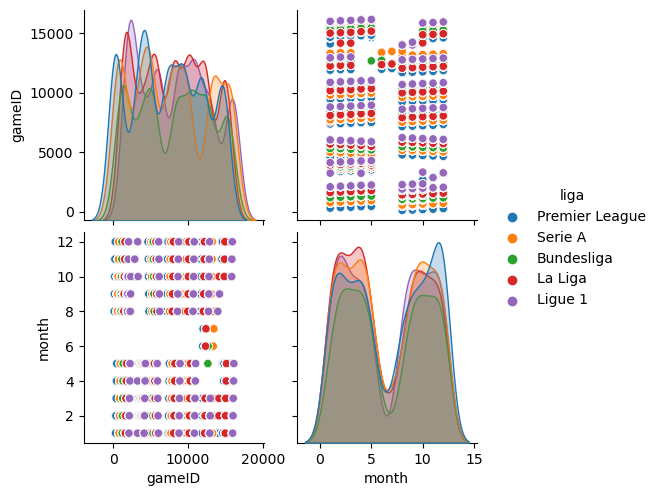

In [42]:
data=df_games.loc[:,["gameID","month","liga"]]
sns.pairplot(data=data, hue="liga")

Se puede comprobar que en promedio hay una cantidad de 250 y 300 partidos por mes. A su vez, se refleja una merma en la cantidad de los mismos entre los meses de junio a agosto, debido al receso existente entre el fin de la temporada y comienzo de la nueva.
Como dato a destacar, se puede visualizar la gran cantidad de partidos que hay en Inglaterra en el mes de diciembre, debido a que existe el Boxing Day, la fecha que se juega siempre en Navidad.

**¿Que liga es la más atractiva para ver fútbol, o sea en cual hay más goles por partido?**

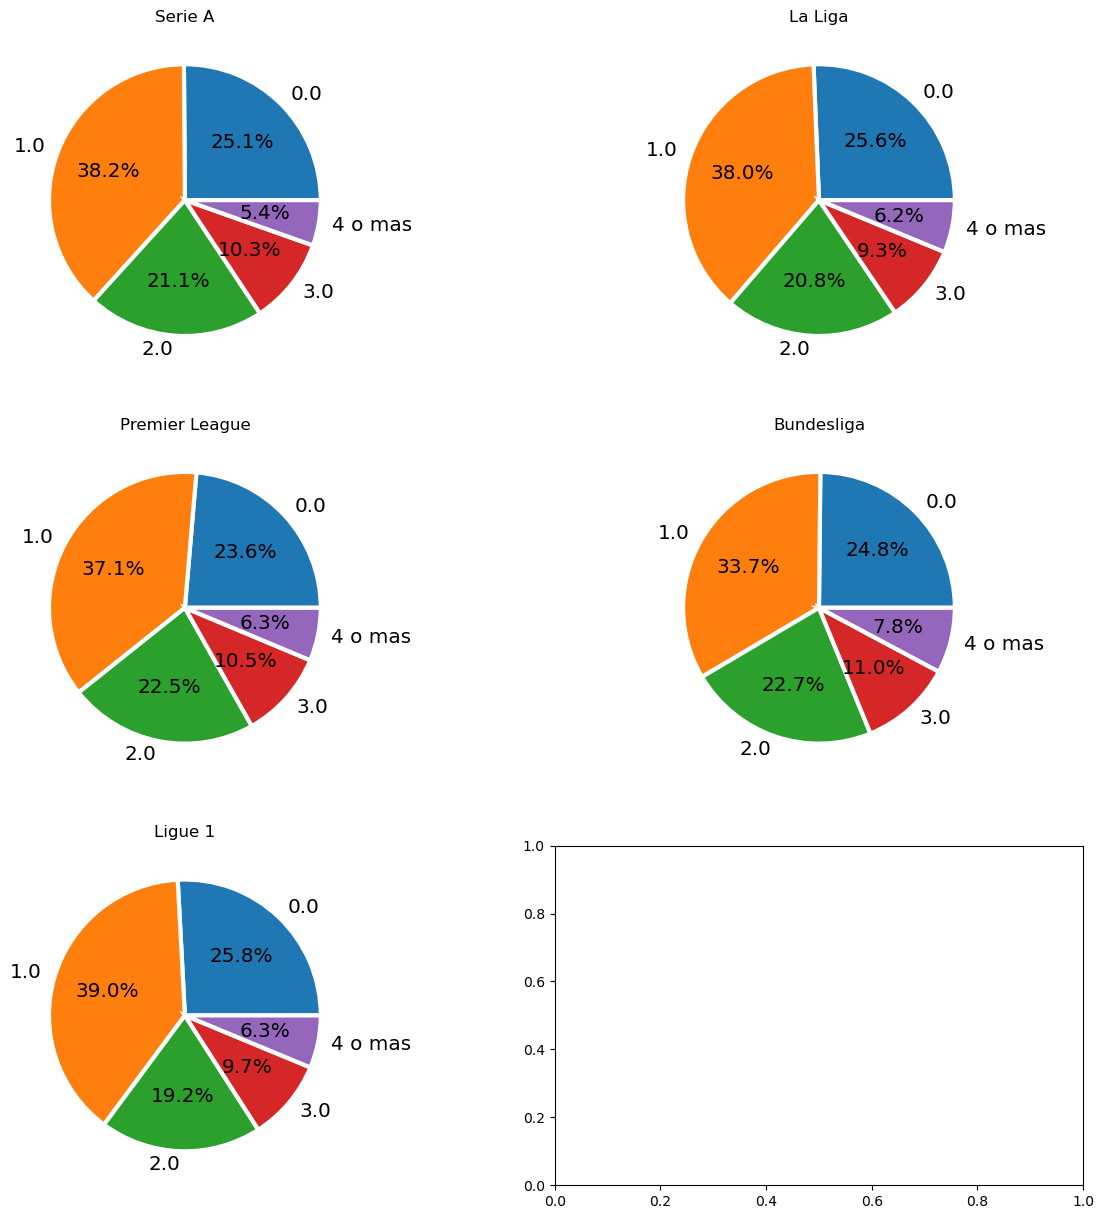

In [43]:

x_seriea=df_f_game_seriea.groupby(['diff_labels'])['gameID']
x_laliga=df_f_game_laliga.groupby(['diff_labels'])['gameID']
x_premier=df_f_game_premier.groupby(['diff_labels'])['gameID']
x_bundesliga=df_f_game_bundesliga.groupby(['diff_labels'])['gameID']
x_ligue1=df_f_game_ligue1.groupby(['diff_labels'])['gameID']




fig, ax = plt.subplots(3, 2, figsize=(15, 15))
autopct='%.1f%%'
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}
textprops={'size': 'x-large'}
ax[0,0].pie(x_seriea.count(),labels= x_seriea.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,1].pie(x_laliga.count(),labels= x_laliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,0].pie(x_premier.count(),labels= x_premier.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,1].pie(x_bundesliga.count(),labels= x_bundesliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[2,0].pie(x_ligue1.count(),labels= x_ligue1.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,0].set_title('Serie A')
ax[0,1].set_title('La Liga')
ax[1,0].set_title('Premier League')
ax[1,1].set_title('Bundesliga')
ax[2,0].set_title('Ligue 1')
plt.show()

Como se puede visualizar en los gráficos, la Bundesliga y la Premier League son las más atractiva, debido a que son las que tienen el porcentaje más alto de varios goles por partido. También son las que tienen el menor porcentaje de 0 goles por partido.

**¿Los jugadores con más goles, son los más reconocidos mundialmente?**

In [44]:


df_p_app= pd.merge(
    df_appearances,
    df_players,
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)


df_p_app= pd.merge(
    df_p_app,
    df_games[['gameID','season']],
    on='gameID',
    how="left",
)
df_prob_stats= pd.merge(
    df_p_app[["gameID","goals","playerID","xGoals","xGoalsChain","xGoalsBuildup","xAssists",'season']],
    df_players[['name',"playerID"]],
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)

df_prob_stats= df_prob_stats[['gameID','season','name', 'playerID', 'goals', 'xGoals', 'xGoalsChain', 'xGoalsBuildup',
       'xAssists' ]]




C:\Users\Mati\AppData\Local\Temp\ipykernel_336\2554524409.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'playerID_df2_y'} in the result is deprecated and will raise a MergeError in a future version.
  df_p_app= pd.merge(


C:\Users\Mati\AppData\Local\Temp\ipykernel_336\2388571642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mas_de_100.sort_values(by='goals',inplace=True )


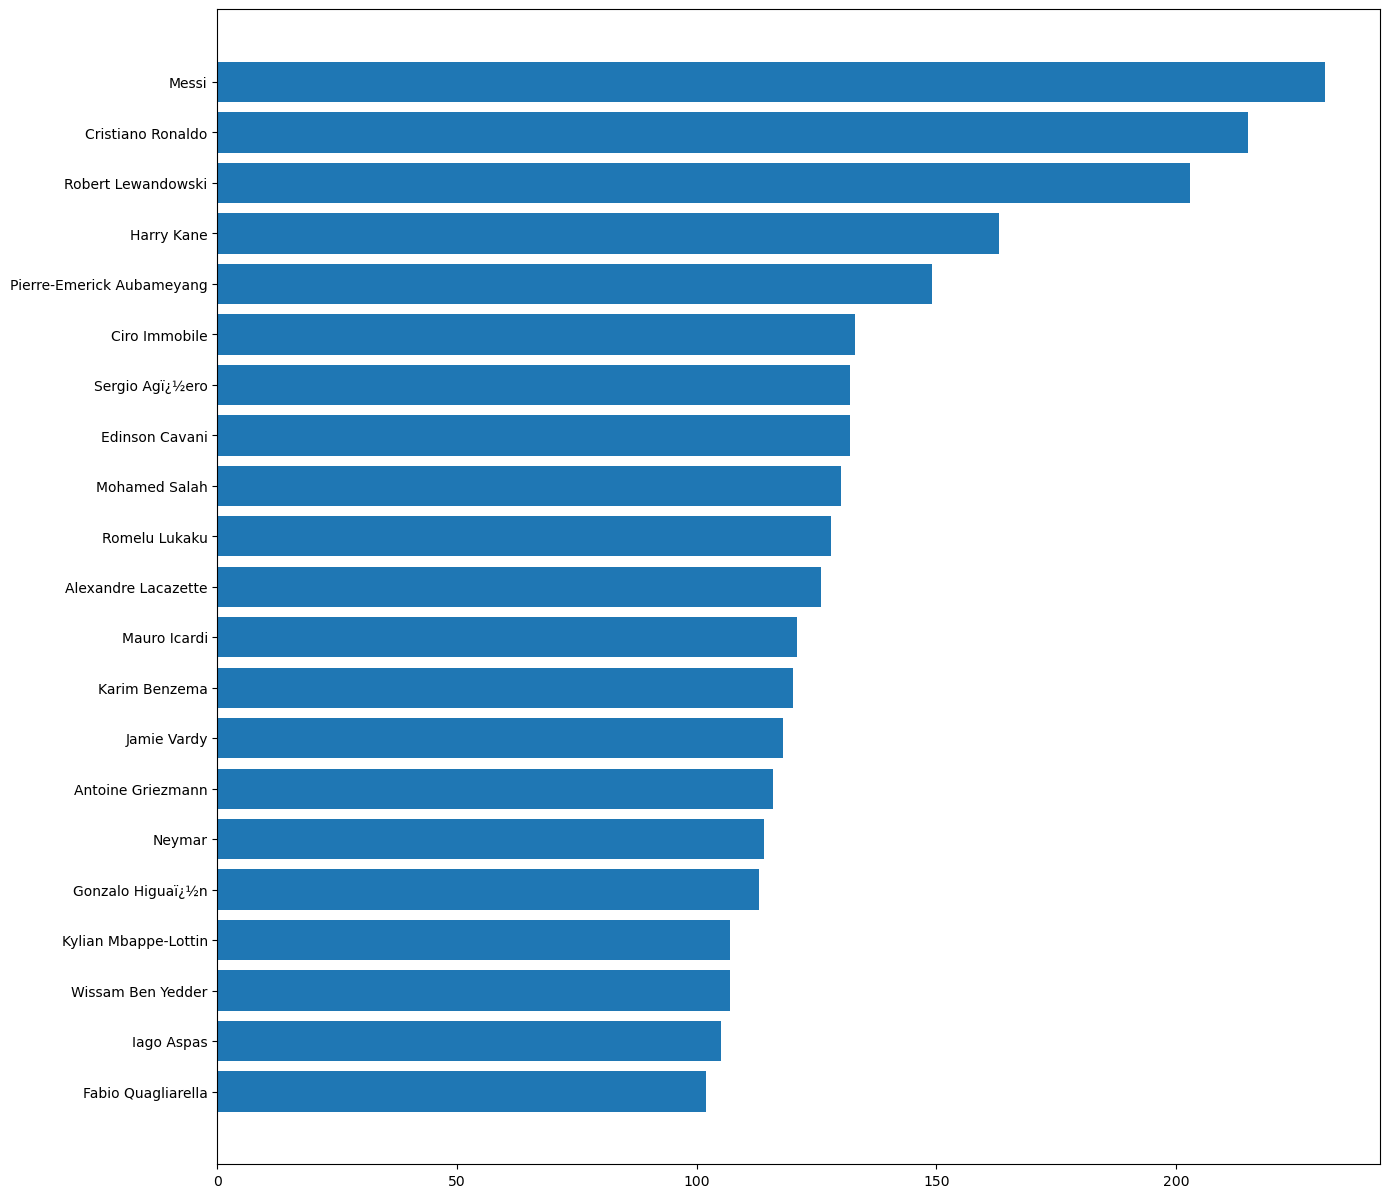

In [45]:
grouped_goal_total=df_prob_stats.groupby(["name"],as_index=False)["goals"].sum()

mas_de_100=grouped_goal_total.loc[grouped_goal_total['goals']>100]
mas_de_100.sort_values(by='goals',inplace=True )

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(list(mas_de_100["name"])  ,  list(mas_de_100['goals'])  )

df_filtered=df_prob_stats[df_prob_stats['name'].isin(mas_de_100['name'])]
df_filtered=df_filtered.groupby(["name",'season'],as_index=False)["goals"].sum()
df_filtered.sort_values(by=['season',"name"],inplace=True)

Como puede comprobarse en el gráfico precendete, tanto Lionel Messi como Cristiano Ronaldo, las máximas figuras de los últimos años, lideran la tabla de artilleros del periodo analizado, superando los 200 goles a nivel clubes.

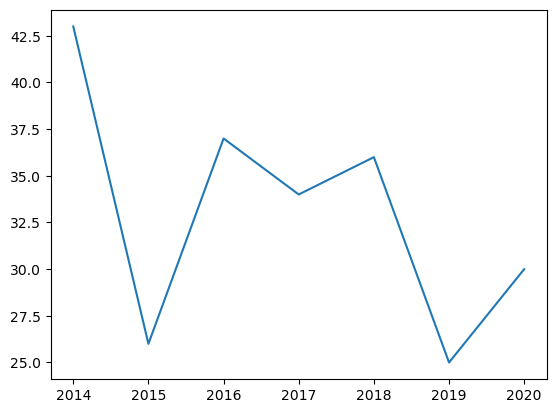

In [46]:
fig1, ax1 = plt.subplots()

ax1.plot(df_filtered[df_filtered['name'].str.contains("Messi")].season,   df_filtered[df_filtered['name'].str.contains("Messi")].goals, label=df_filtered[df_filtered['name'].str.contains("Messi")].name)

In [47]:
df_players.loc[df_players['name'].str.contains("Lionel Messi")]

,playerID,playerID_df2,name,playerID_df2_x,playerID_df2_y,player_id,pretty_name,club_id,club_pretty_name,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,agent_name,contract_expiration_date,domestic_competition_id,club_name,image_url,last_season,url


En este último gráfico se puede observar como fue variando los goles de Lionel Messi a lo largo del periodo de tiempo en cuestión. Después de una espectacular temporada en el 2014, su rendimiento mermó, lógicamente por una cuestión natural como es la edad.

##Analizamos xGoals

Agrupamos los equipos por localía y tomamos los xGoals en esa condición (local o visitante).

In [48]:
prom_home_xgoal=df_games.groupby(['homeTeamID'],as_index=False)
prom_away_xgoal=df_games.groupby(['awayTeamID'],as_index=False)
prom_home_xgoal=prom_home_xgoal['xGoals_home'].mean().sort_values(by="xGoals_home",ascending=False)
prom_away_xgoal=prom_away_xgoal['xGoals_away'].mean().sort_values(by="xGoals_away",ascending=False)

#se mergea con el dataset principal

df_games=pd.merge(df_games,prom_home_xgoal,   
    
    
    left_on="homeTeamID",
    right_on="homeTeamID",
    suffixes=("", "_prom")
  )


df_games=pd.merge(df_games,prom_away_xgoal,   
    
    
    left_on="awayTeamID",
    right_on="awayTeamID",
    suffixes=("", "_prom")
  )
df_games


df_games["xgoal_diff"]= abs(df_games["xGoals_home_prom"]  - df_games["xGoals_away_prom"])




<AxesSubplot:xlabel='result_home', ylabel='xgoal_diff'>

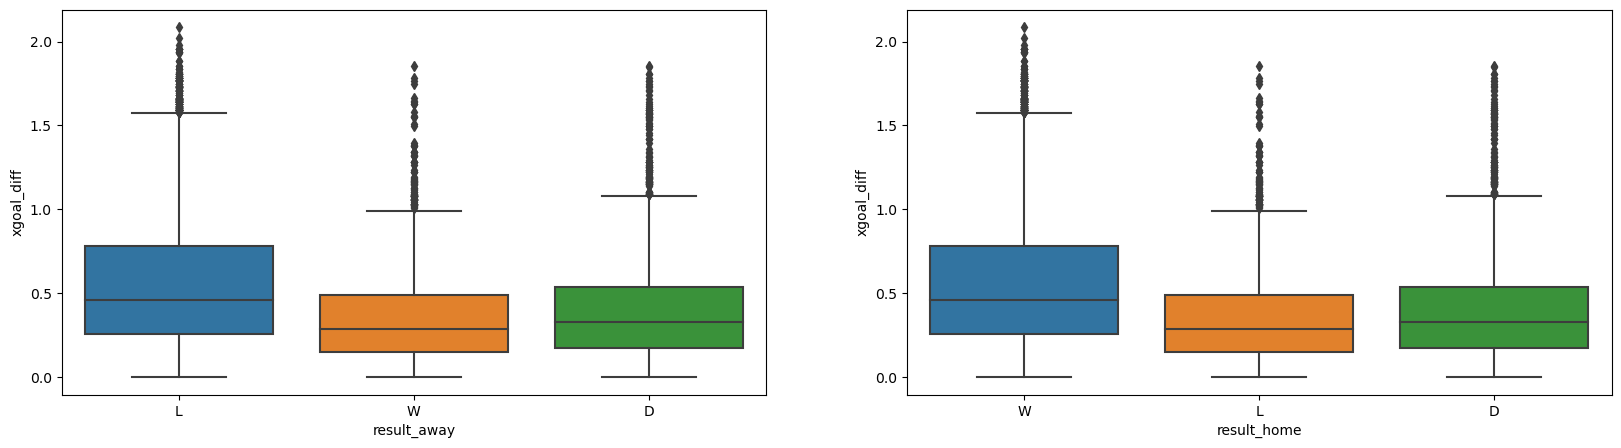

In [49]:

figbi, axesbi = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df_games.result_away, y=df_games.xgoal_diff, data=df_games,ax=axesbi[0])
sns.boxplot(x=df_games.result_home, y=df_games.xgoal_diff, data=df_games,ax=axesbi[1])




En el gráfico que precede se puede observar cómo cambia el resultado según la condición de localía. Si se juega de visitante, se necesita una mayor diferencia de xGoals para ganar que si se juega de local.
También se observan varios outliers que en el siguiente paso los vamos a eliminar.

<AxesSubplot:xlabel='xGoals_home_prom', ylabel='xGoals_away_prom'>

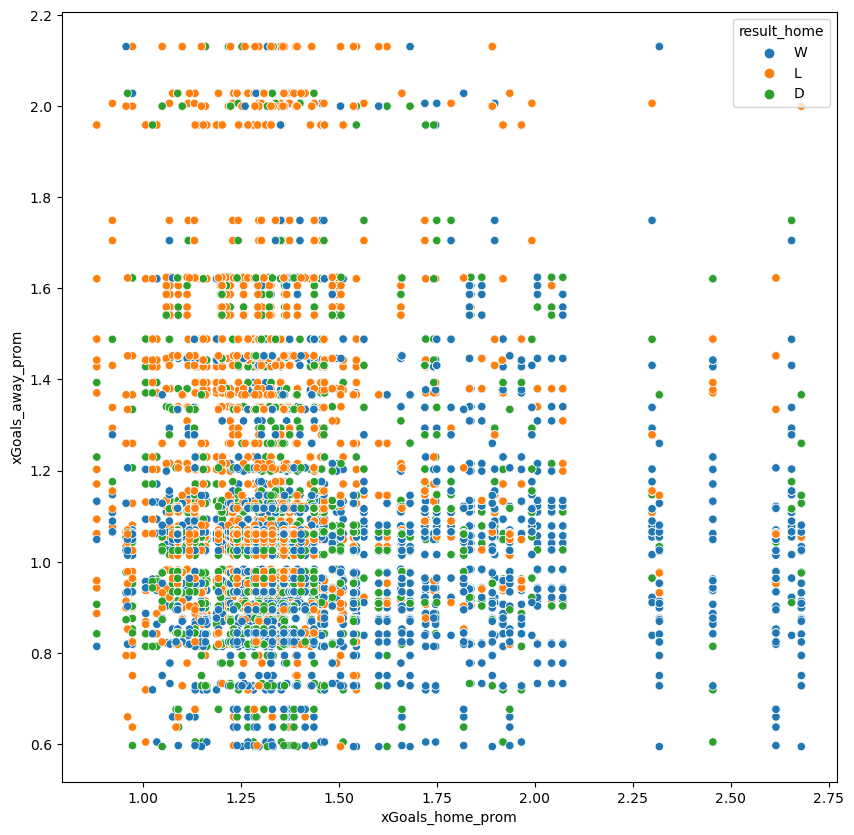

In [50]:
figbi, axesbi = plt.subplots( figsize=(10, 10))
sns.scatterplot(x=df_games.xGoals_home_prom, y=df_games.xGoals_away_prom, hue=df_games.result_home)


Se puede concluir que a mayor xGoals, hay más chances que el equipo gane el partido.
Es interesante notar que el equipo local tiene menos probabilidades de perder cuando su rival le lleva una mayor diferencia de xGoals.

In [51]:
indexwin = df_games[ (df_games['result_home'] == "W") & (df_games['xgoal_diff'] > 1.4) ].index
indexlost = df_games[ (df_games['result_home'] == "L") & (df_games['xgoal_diff'] > 0.9) ].index
indextie = df_games[ (df_games['result_home'] == "D") & (df_games['xgoal_diff'] > 1) ].index


df_games.drop(indexwin , inplace=True)
df_games.drop(indexlost , inplace=True)
df_games.drop(indextie , inplace=True)

<AxesSubplot:xlabel='xGoals_home_prom', ylabel='xGoals_away_prom'>

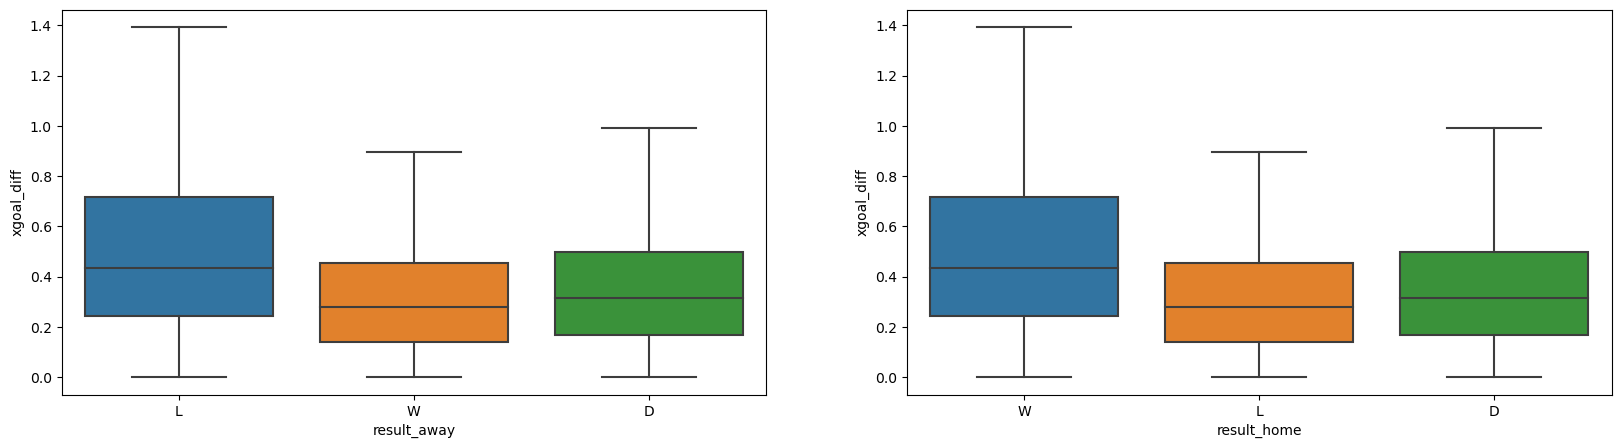

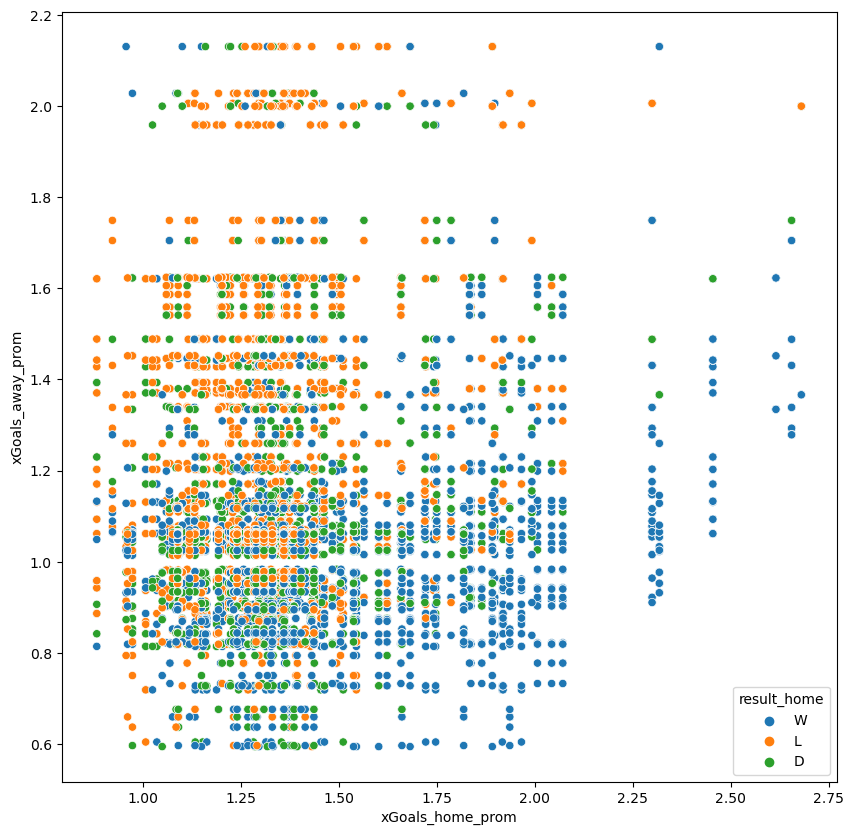

In [52]:
df_games["xgoal_diff"]= abs(df_games["xGoals_home_prom"]  - df_games["xGoals_away_prom"])


figbi, axesbi = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df_games.result_away, y=df_games.xgoal_diff, data=df_games,ax=axesbi[0])
sns.boxplot(x=df_games.result_home, y=df_games.xgoal_diff, data=df_games,ax=axesbi[1])
figbi, axesbi = plt.subplots( figsize=(10, 10))

sns.scatterplot(x=df_games.xGoals_home_prom, y=df_games.xGoals_away_prom, hue=df_games.result_home)

In [53]:
df_games_df_teams=pd.merge(df_games,df_teams,left_on='homeTeamID',right_on='teamID')
df_games_df_teams=pd.merge(df_games_df_teams,df_teams,left_on='awayTeamID',right_on='teamID',suffixes=('_home','_away'))

In [54]:
from sklearn.tree import DecisionTreeClassifier  #arbol de decision
from sklearn import tree #arbol de decision

In [55]:


def whowin(x):
  if x=='W':
    return 1
 
  else:
    return 0
df_games_df_teams.columns

Index(['gameID', 'leagueID', 'season', 'date', 'homeTeamID', 'awayTeamID',
       'homeGoals', 'awayGoals', 'homeProbability', 'drawProbability',
       'awayProbability', 'homeGoalsHalfTime', 'awayGoalsHalfTime', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD',
       'PSCA', 'xGoals_home', 'shots_home', 'shotsOnTarget_home', 'deep_home',
       'ppda_home', 'fouls_home', 'corners_home', 'yellowCards_home',
       'redCards_home', 'result_home', 'xGoals_away', 'shots_away',
       'shotsOnTarget_away', 'deep_away', 'ppda_away', 'fouls_away',
       'corners_away', 'yellowCards_away', 'redCards_away', 'result_away',
       'liga', 'home_name', 'away_name', 'month_year', 'match_name',
       'totalGoals', 'goal_diff', 'diff_labels', 'month', 'xGoals_home_prom',
       'xGoals_away_prom', 'xgoal_diff', 'teamID_home', 'name_home',
       'club_id_home', 'pretty_name_home', 'dom

In [56]:
df_games_df_teams_sum=df_games_df_teams[['season','xGoals_home','xGoals_away','total_market_value_home','average_age_home','total_market_value_away','average_age_away']]








In [57]:
''' corr_df = df_games_df_teams_sum.corr(method='pearson') 
 
plt.figure(figsize=(15, 15))
 
sns.heatmap(corr_df,annot=True)
plt.show() '''

" corr_df = df_games_df_teams_sum.corr(method='pearson') \n \nplt.figure(figsize=(15, 15))\n \nsns.heatmap(corr_df,annot=True)\nplt.show() "

In [58]:
df_games_df_teams_sum_season=df_games_df_teams_sum[['season']]
from sklearn.preprocessing import StandardScaler

datos_escalados=StandardScaler().fit_transform(df_games_df_teams_sum[['xGoals_home', 'xGoals_away', 'total_market_value_home','average_age_home','total_market_value_away','average_age_away']])

df1_scaled=pd.DataFrame(datos_escalados,columns=['xGoals_home', 'xGoals_away', 'total_market_value_home','average_age_home','total_market_value_away','average_age_away'],index=df_games_df_teams_sum.index)

df_games_df_teams_sum=pd.concat([df_games_df_teams_sum_season,df1_scaled], axis=1)


df_games_df_teams_sum['all_result']=df_games_df_teams['result_home'].apply(lambda x: whowin(x))


In [59]:
df_games_df_teams_sum

,season,xGoals_home,xGoals_away,total_market_value_home,average_age_home,total_market_value_away,average_age_away,all_result
0,2015.0,-0.980626,-0.663849,-0.223139,0.145764,-0.218508,0.225827,1
1,2016.0,-0.485737,-0.604838,-0.223139,0.145764,-0.218508,0.225827,1
2,2014.0,-0.510552,-1.267839,-0.223139,0.145764,-0.218508,0.225827,1
3,2017.0,-0.609569,-0.131704,-0.223139,0.145764,-0.218508,0.225827,1
4,2018.0,-0.069686,0.798505,-0.223139,0.145764,-0.218508,0.225827,0
...,...,...,...,...,...,...,...,...
12039,2015.0,-0.439748,0.227166,-0.223139,-0.683658,-0.218508,-0.768385,0
12040,2017.0,-0.949988,-0.827763,-0.223139,-0.683658,-0.218508,-0.768385,1
12041,2015.0,-0.468215,0.276603,18.626455,-1.513080,-0.218508,-0.768385,0
12042,2016.0,-0.563522,0.126654,-0.555717,-1.286874,-0.218508,-0.768385,0


In [60]:
test=df_games_df_teams_sum.loc[df_games_df_teams_sum["season"]>2018]
train=df_games_df_teams_sum.loc[df_games_df_teams_sum["season"]<=2017]

y_train = train['all_result']
x_train = train.drop('all_result',axis= 1)

y_test = test['all_result']
x_test = test.drop('all_result',axis= 1)



In [61]:
# ajustar arbol de decisión simple con hiperparametros (defecto)
clf = DecisionTreeClassifier(random_state=435)

clf.fit(x_train, y_train ) 

DecisionTreeClassifier(random_state=435)

In [62]:
''' # Graficando
fig = plt.figure(figsize=(18,10))
tree.plot_tree(clf,
               feature_names=x_train.columns)

plt.show() '''

' # Graficando\nfig = plt.figure(figsize=(18,10))\ntree.plot_tree(clf,\n               feature_names=x_train.columns)\n\nplt.show() '

In [63]:


y_pred = clf.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
def accuracy_manual(y_test,y_pred):
  posicion=0
  valores_iguales=0

  while posicion<len(y_test):
    if y_test[posicion]==y_pred[posicion]:
      valores_iguales+=1
    posicion+=1

  return valores_iguales

numero_predicciones_correctas=accuracy_manual(y_test.values, y_pred)

numero_total_predicciones=len(y_test)

accuracy_score_arbol= numero_predicciones_correctas/numero_total_predicciones

print("Accuracy:",accuracy_score_arbol)

Accuracy: 0.6458024325126075
